In [1]:
#necessary imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [2]:
df=pd.read_csv('/content/SBI3Y.csv',index_col='Date',parse_dates=True)#reading data to a pandas dataframe

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-24,368.500000,369.049988,358.649994,359.850006,344.386780,42318999
2021-03-25,360.000000,360.850006,345.200012,355.200012,339.936615,57495003
2021-03-26,360.000000,362.000000,354.549988,357.200012,341.850647,40718848
2021-03-30,360.100006,364.299988,356.299988,360.799988,345.295959,39405124
2021-03-31,360.299988,367.850006,357.950012,364.299988,348.645538,38651025


In [4]:
# performing the necessary statistics
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,742.000000,742.000000,742.000000,742.000000,742.000000,7.420000e+02
mean,530.184502,535.709098,524.120619,529.903370,520.149722,1.989648e+07
std,85.002279,85.370810,84.655232,84.969595,89.607174,1.481146e+07
min,326.000000,332.049988,321.299988,328.850006,314.718903,3.692065e+06
25%,469.012512,475.512497,463.275009,468.399994,455.863212,1.187084e+07
50%,530.475006,535.649994,524.200012,530.100006,518.057831,1.578465e+07
75%,586.937500,590.250015,580.662506,585.287476,581.326172,2.245517e+07
max,790.000000,793.400024,783.000000,788.049988,788.049988,1.928108e+08


### Data Preprocessing and Exploratory data analysis

Performance of a stock is anlysed base on the daily returns% i.e, valve-prev/prev % .
calculating the daily returns for the closed data

In [5]:
df['daily_returns']=df['Close'].pct_change()

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,daily_returns
Date,,,,,,,
2021-03-24,368.500000,369.049988,358.649994,359.850006,344.386780,42318999,NaN
2021-03-25,360.000000,360.850006,345.200012,355.200012,339.936615,57495003,-0.012922
2021-03-26,360.000000,362.000000,354.549988,357.200012,341.850647,40718848,0.005631
2021-03-30,360.100006,364.299988,356.299988,360.799988,345.295959,39405124,0.010078
2021-03-31,360.299988,367.850006,357.950012,364.299988,348.645538,38651025,0.009701


In [7]:
df=df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,daily_returns
Date,,,,,,,
2021-03-25,360.000000,360.850006,345.200012,355.200012,339.936615,57495003,-0.012922
2021-03-26,360.000000,362.000000,354.549988,357.200012,341.850647,40718848,0.005631
2021-03-30,360.100006,364.299988,356.299988,360.799988,345.295959,39405124,0.010078
2021-03-31,360.299988,367.850006,357.950012,364.299988,348.645538,38651025,0.009701
2021-04-01,367.700012,371.899994,363.100006,370.649994,354.722687,31883453,0.017431


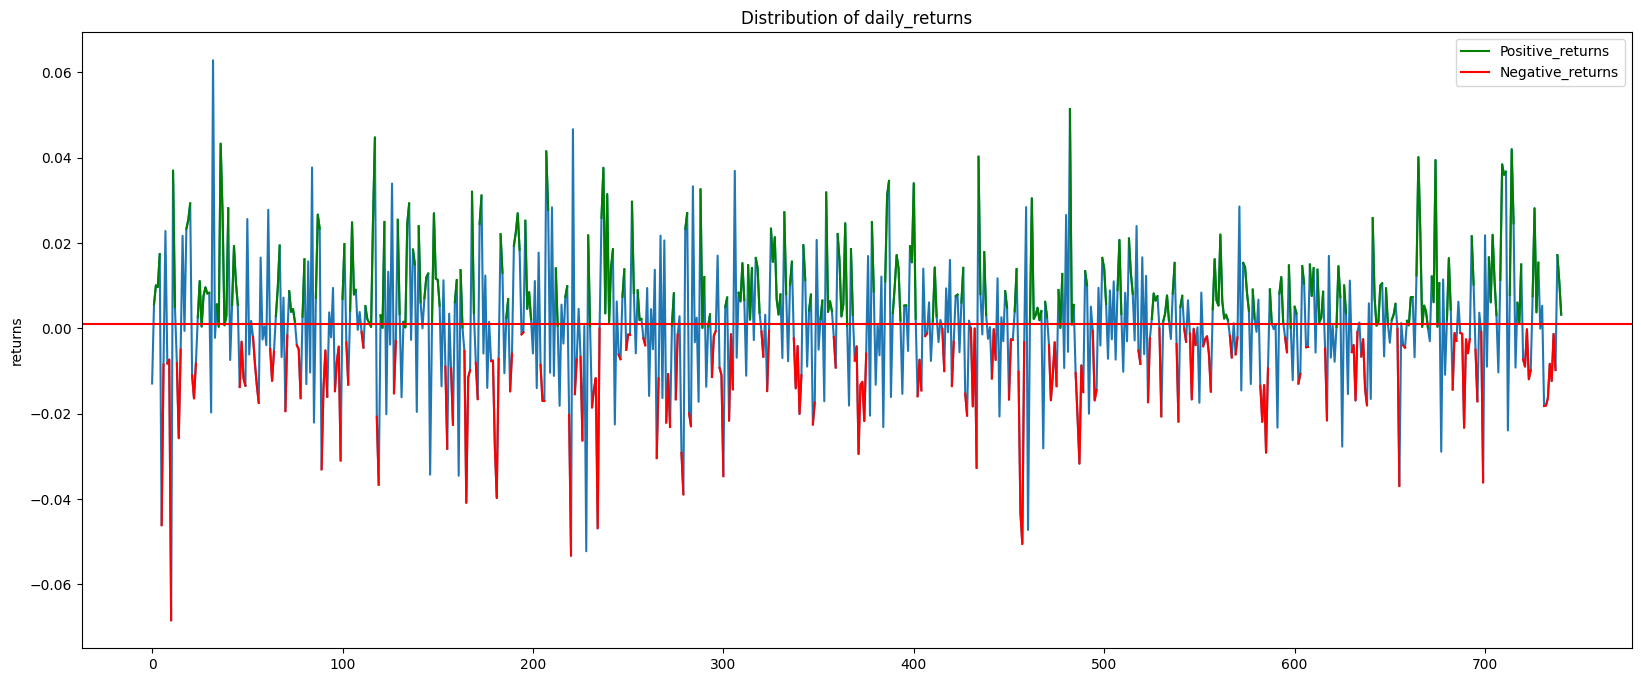

In [8]:
# in the above plot the values with positve returns above 0 are shown in green and values with negative returns are shown in red color
fig, ax = plt.subplots(figsize=(20,8))
plt.plot(df['daily_returns'].values)
plt.plot(np.where(df['daily_returns']>0,df['daily_returns'], None), color="green", label="Positive_returns")
plt.plot(np.where(df['daily_returns'] <= 0,df['daily_returns'], None), color="red", label="Negative_returns")
plt.axhline(df['daily_returns'].mean(), color='red')
plt.legend()
plt.ylabel('returns')
plt.title('Distribution of daily_returns')
plt.show()

In [9]:
df['daily_returns'].describe()

count    741.000000
mean       0.001112
std        0.015902
min       -0.068414
25%       -0.007700
50%        0.001243
75%        0.009498
max        0.062838
Name: daily_returns, dtype: float64

In [10]:
returns_quantiles= df['daily_returns'].describe()[['25%','50%','75%','max']]

<ipython-input-11-1843fd361d7d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(returns_quantiles,palette='rainbow') # plotting the returns quatilels


<Axes: ylabel='daily_returns'>

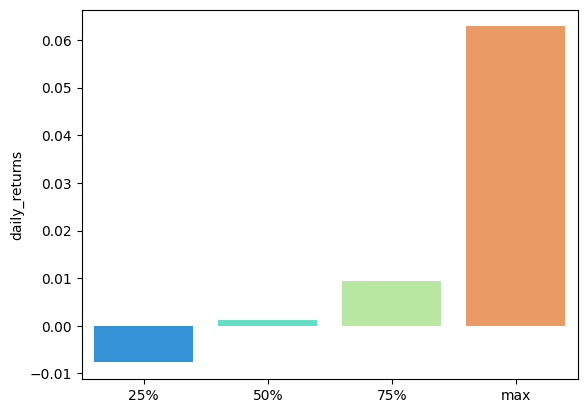

In [11]:
sns.barplot(returns_quantiles,palette='rainbow') # plotting the returns quatilels

In [12]:
#calculating outliers
Q1= -0.009777
Q3= 0.011454
IQR= Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR
outliers =df[(df['daily_returns']>upper_bound) | (df['daily_returns']<lower_bound)]

In [13]:
outliers

,Open,High,Low,Close,Adj Close,Volume,daily_returns
Date,,,,,,,
2021-04-05,367.500000,369.200012,349.049988,353.549988,338.357483,51743981,-0.046135
2021-04-12,344.000000,344.000000,322.549988,328.850006,314.718903,75501713,-0.068414
2021-05-17,364.399994,385.200012,363.649994,383.100006,366.637695,106555796,0.062838
2021-09-16,444.850006,466.100006,442.750000,463.700012,447.871368,42637448,0.044722
2022-02-14,515.000000,515.599976,499.700012,501.399994,484.284454,26153332,-0.053248
2022-02-15,502.000000,526.849976,497.100006,524.799988,506.885651,23842951,0.046669
2022-02-24,480.000000,487.950012,468.000000,472.649994,456.515869,32356037,-0.052236
2022-03-07,447.500000,453.950012,433.450012,440.299988,425.270142,33720472,-0.046867
2023-01-25,595.849976,595.849976,567.400024,568.700012,557.859375,25686294,-0.043156


In [14]:
outliers=outliers.sort_values('daily_returns',ascending=False)

In [15]:
outliers

,Open,High,Low,Close,Adj Close,Volume,daily_returns
Date,,,,,,,
2021-05-17,364.399994,385.200012,363.649994,383.100006,366.637695,106555796,0.062838
2023-03-03,542.000000,564.299988,541.750000,561.200012,550.502380,27656538,0.051429
2022-02-15,502.000000,526.849976,497.100006,524.799988,506.885651,23842951,0.046669
2021-09-16,444.850006,466.100006,442.750000,463.700012,447.871368,42637448,0.044722
2023-01-25,595.849976,595.849976,567.400024,568.700012,557.859375,25686294,-0.043156
2021-04-05,367.500000,369.200012,349.049988,353.549988,338.357483,51743981,-0.046135
2022-03-07,447.500000,453.950012,433.450012,440.299988,425.270142,33720472,-0.046867
2023-02-01,561.400024,565.000000,499.350006,527.349976,517.297546,38218810,-0.047245
2023-01-27,568.000000,568.549988,532.250000,539.950012,529.657410,40163464,-0.050554


Here further see the reason for particular outliers. For example on May5 2021 stok market has rose due to psu etc

In [16]:
df['year'] = pd.DatetimeIndex(df.index).year

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


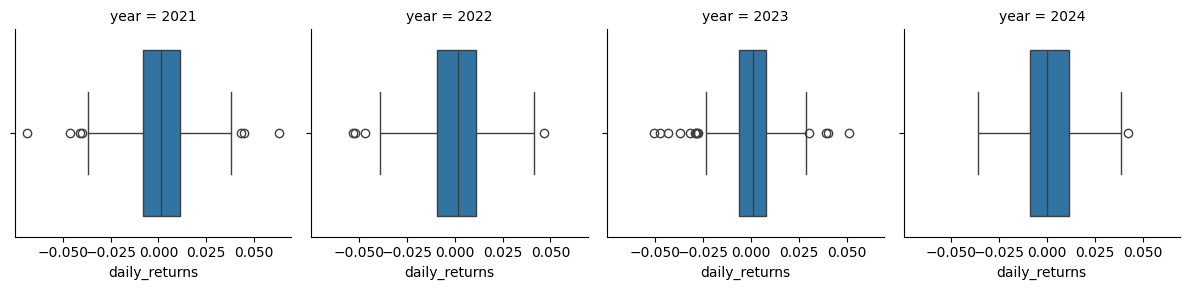

In [17]:
# outliers identified based on year
g = sns.FacetGrid(df, col="year")
g.map(sns.boxplot, "daily_returns")

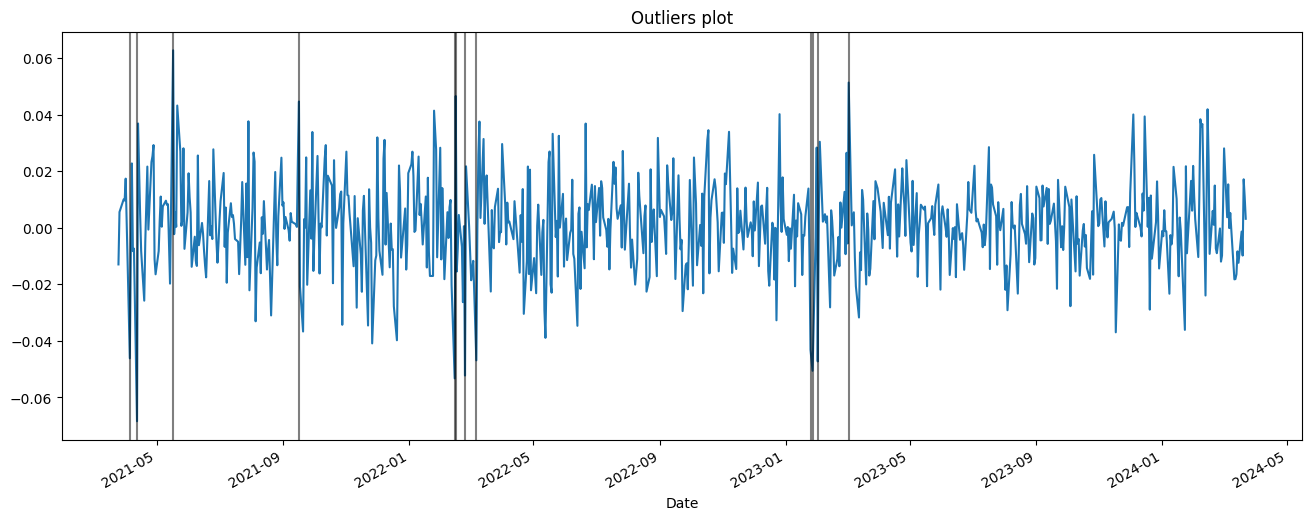

In [18]:
ax=df['daily_returns'].plot(figsize=(16,6),title='Outliers plot')
for i in outliers.index:
  ax.axvline(i,color='black',alpha=0.5)

### Understanding the ETS(error, trend and seasonality of the stock by using ETS decomposition method of statsmodels library)

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
result=seasonal_decompose(df['daily_returns'],model='additive',period=12) # there are two modes for trend analysis either additive or multiplicative.we have taken additive method since our data contains negative values

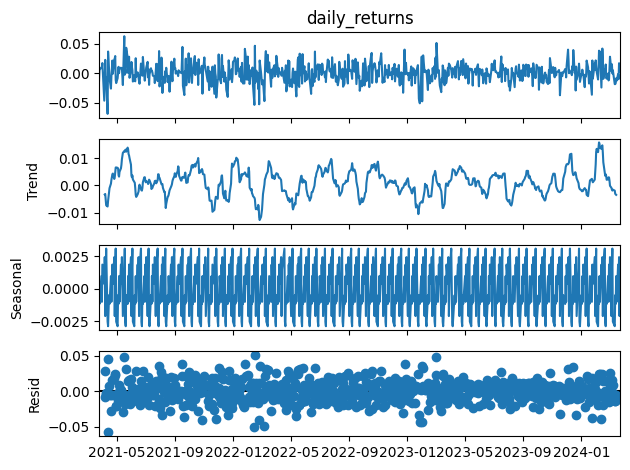

In [21]:
result.plot();

##### from the above we can make following inference


*   Residuals are very high which shows uncertainity of data

*   Data follows a cyclic pattern which have to be obtained by using forecasting models and find the seasonal components









We have taken 1d , 3d and 5d simple moving averages in order to analyze the trend or seasonality

In [22]:
df['sma1d']=df['daily_returns'].rolling(window=1).mean()

In [23]:
df['sma3d']=df['daily_returns'].rolling(window=3).mean()

In [24]:
df['sma5d']=df['daily_returns'].rolling(window=5).mean()

In [25]:
df=df.dropna()

In [26]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,daily_returns,year,sma1d,sma3d,sma5d
Date,,,,,,,,,,,
2021-04-01,367.700012,371.899994,363.100006,370.649994,354.722687,31883453,0.017431,2021,0.017431,0.012403,0.005984
2021-04-05,367.500000,369.200012,349.049988,353.549988,338.357483,51743981,-0.046135,2021,-0.046135,-0.006335,-0.000659
2021-04-06,355.700012,357.000000,349.299988,350.549988,335.486420,44147709,-0.008485,2021,-0.008485,-0.012397,-0.003482
2021-04-07,351.250000,363.200012,347.600006,358.549988,343.142639,48023602,0.022821,2021,0.022821,-0.010600,-0.000934
2021-04-08,361.000000,363.299988,354.299988,355.600006,340.319427,33370259,-0.008228,2021,-0.008228,0.002036,-0.004519


<Axes: xlabel='Date'>

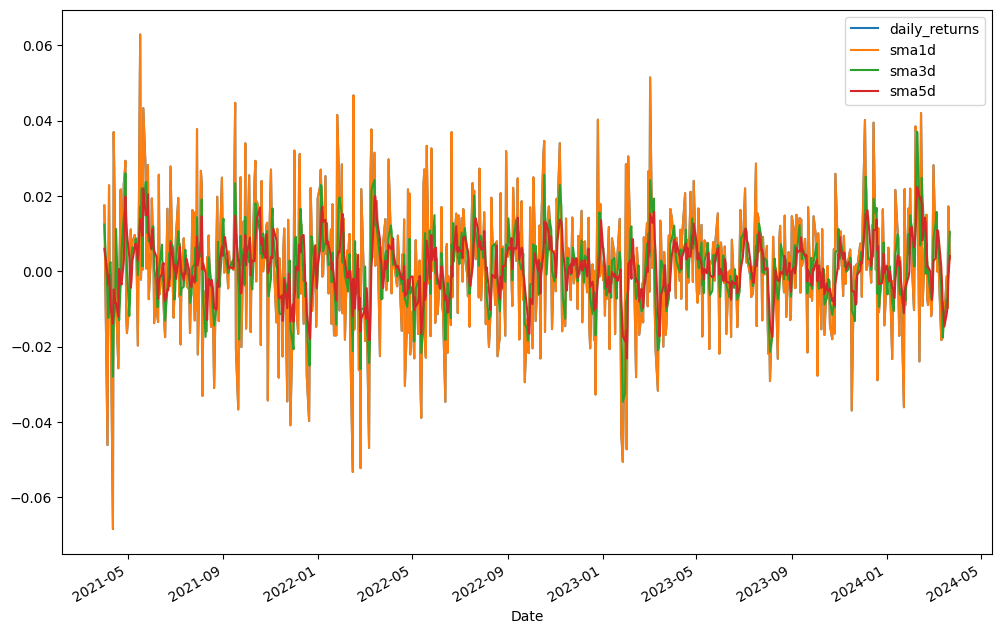

In [29]:
df[['daily_returns','sma1d','sma3d','sma5d']].plot(figsize=(12,8))

<Axes: xlabel='Date'>

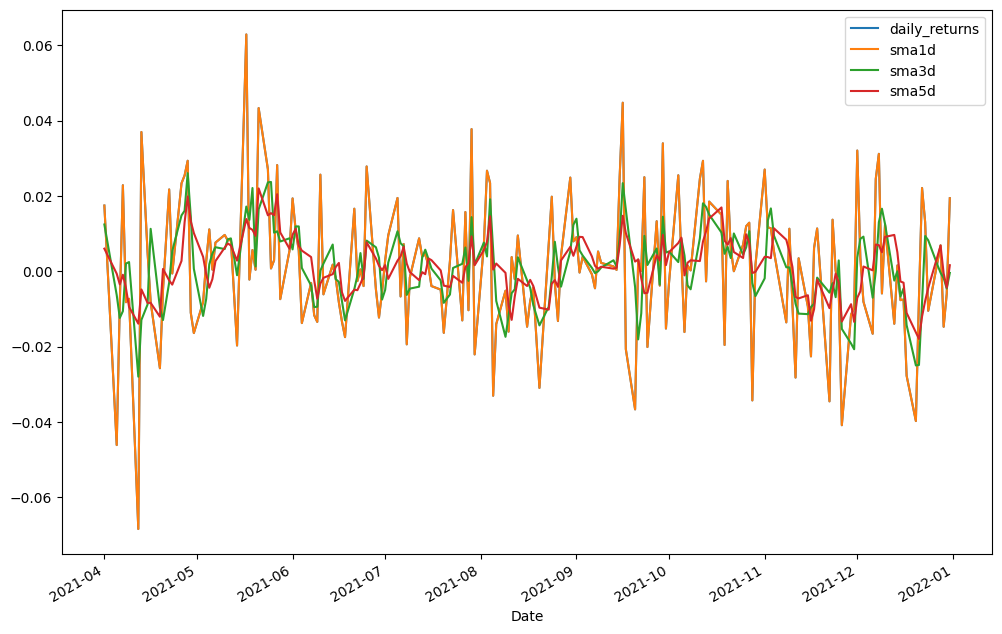

In [36]:
#Distribution for 2021
df[:'2021-12-31'][['daily_returns','sma1d','sma3d','sma5d']].plot(figsize=(12,8))

<Axes: xlabel='Date'>

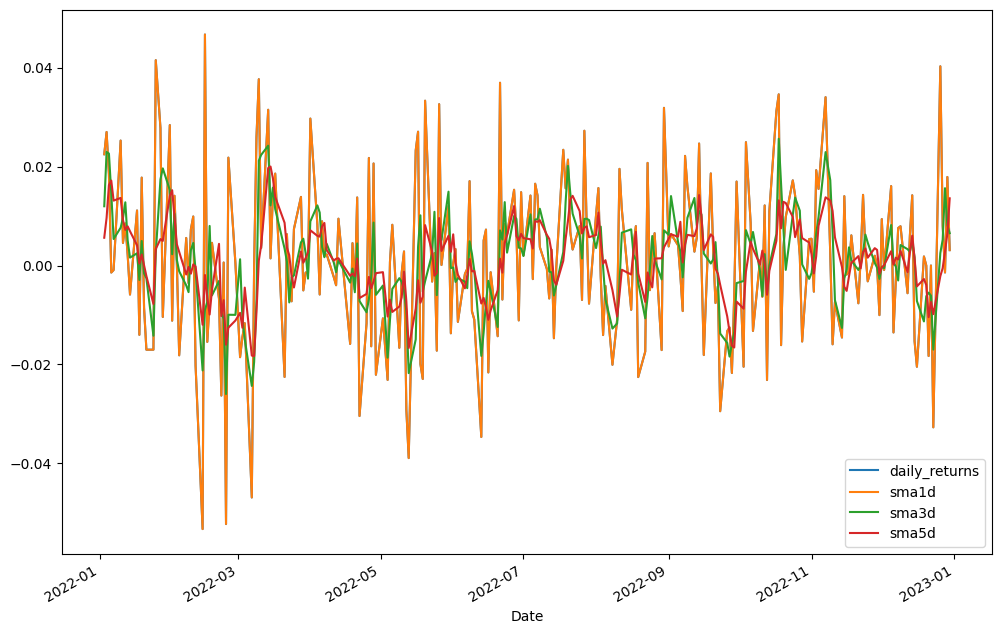

In [37]:
#Distribution for 2022
df['2022-01-01':'2023-01-01'][['daily_returns','sma1d','sma3d','sma5d']].plot(figsize=(12,8))

<Axes: xlabel='Date'>

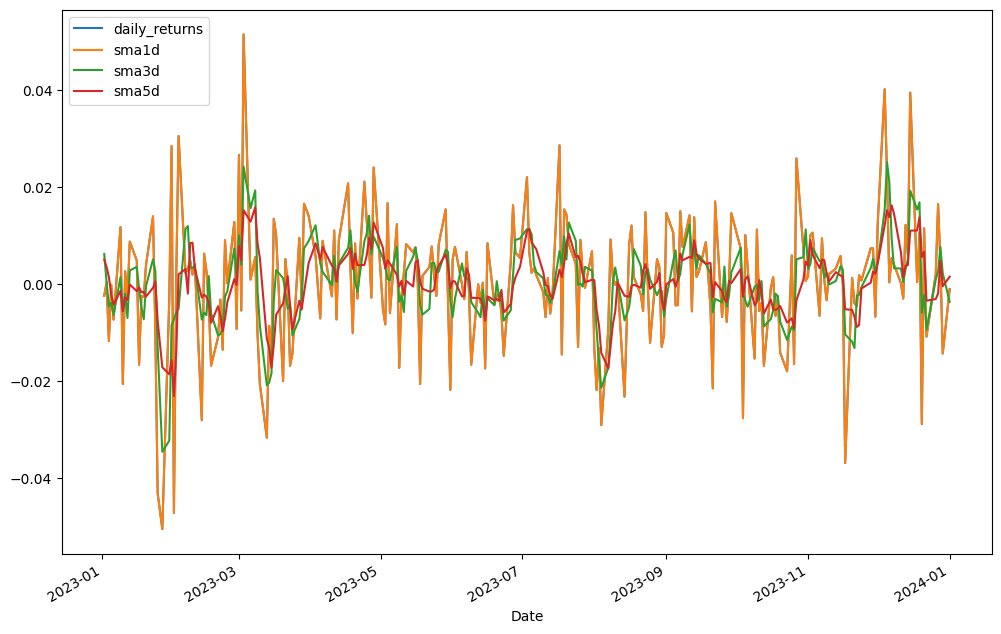

In [38]:
#distribution for 2023
df['2023-01-01':'2024-01-01'][['daily_returns','sma1d','sma3d','sma5d']].plot(figsize=(12,8))

<Axes: xlabel='Date'>

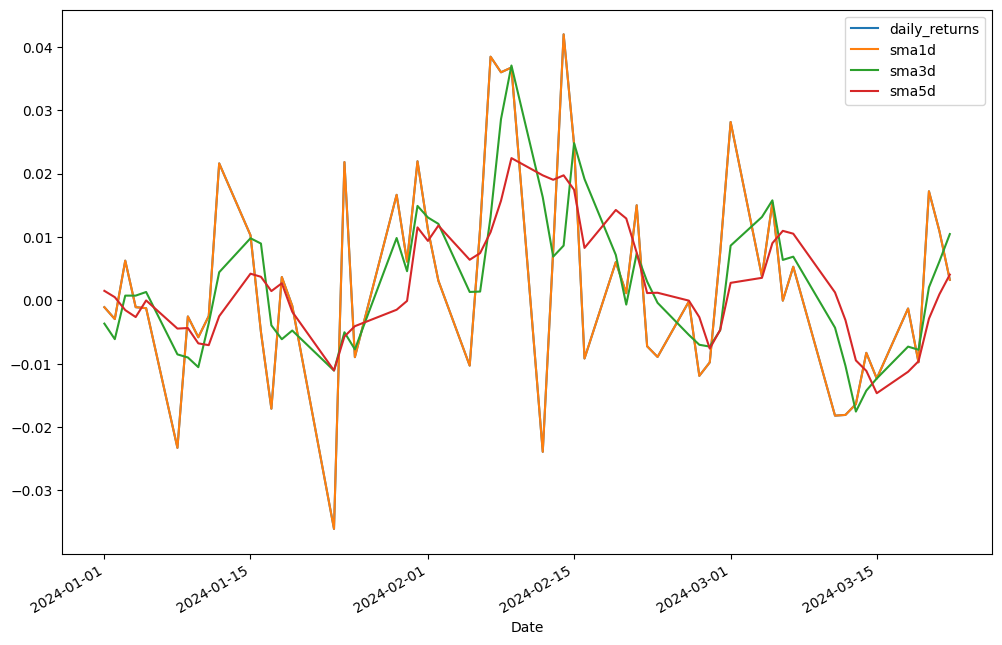

In [39]:
#distribution for 2024
df['2024-01-01':][['daily_returns','sma1d','sma3d','sma5d']].plot(figsize=(12,8))

##### Checking if the returs distribution is stationery by using Augumented Dickey fuller test

In [40]:
# Using Augumented dickey fuller test
from statsmodels.tsa.stattools import adfuller
def adf_test(series,title=''):
   print('Augmented Dicky fuller test :{title}')
   result=adfuller(series.dropna(),autolag='AIC')
   labels=['ADF test_statistic','p-value','#lags_used','#observations']
   out=pd.Series(result[0:4],index=labels)
   for key,val in result[4].items():
    out[f'Critical value ({key})']=val
   print(out.to_string())
   if result[1]<0.05:
    print('reject null hypothesis')
    print('Data has no unit root and is stationary')
   else:
    print('no evidence to reject null hypothesis')
    print('Data has unit root and is non-stationary')


In [41]:
adf_test(df['daily_returns']) #here we can see that as p-value is less that 0.05 it falls in the region of rejection of null hypothesis and the data is stationery which was observed that data is around the mean

Augmented Dicky fuller test :{title}
ADF test_statistic     -1.224990e+01
p-value                 9.593358e-23
#lags_used              3.000000e+00
#observations           7.330000e+02
Critical value (1%)    -3.439303e+00
Critical value (5%)    -2.865491e+00
Critical value (10%)   -2.568874e+00
reject null hypothesis
Data has no unit root and is stationary


 #here we can see that as p-value is less that 0.05 it falls in the region of rejection of null hypothesis and the data is stationery which was observed that data is around the mean

In [42]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,daily_returns,year,sma1d,sma3d,sma5d
Date,,,,,,,,,,,
2024-03-18,727.099976,737.900024,722.099976,730.950012,730.950012,18145126,-0.001298,2024,-0.001298,-0.007314,-0.011285
2024-03-19,730.000000,734.349976,721.150024,723.799988,723.799988,15205043,-0.009782,2024,-0.009782,-0.007809,-0.009622
2024-03-20,725.150024,738.950012,719.799988,736.250000,736.250000,25405455,0.017201,2024,0.017201,0.002040,-0.002905
2024-03-21,742.000000,750.599976,740.549988,744.299988,744.299988,15161161,0.010934,2024,0.010934,0.006118,0.000942
2024-03-22,743.849976,748.799988,741.400024,746.700012,746.700012,15535921,0.003225,2024,0.003225,0.010453,0.004056


### Choosing the appropriate model

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

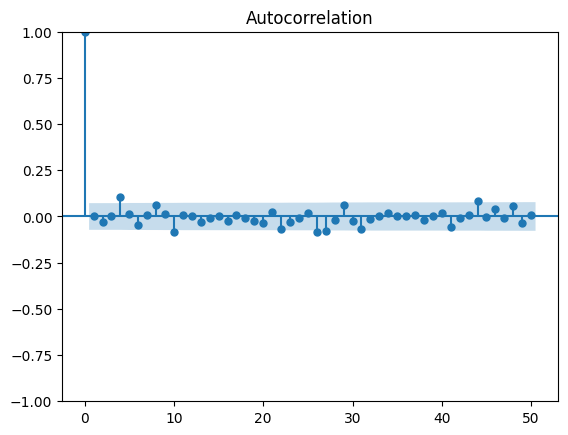

In [44]:
acf_plot = plot_acf(df['daily_returns'], lags = 50)

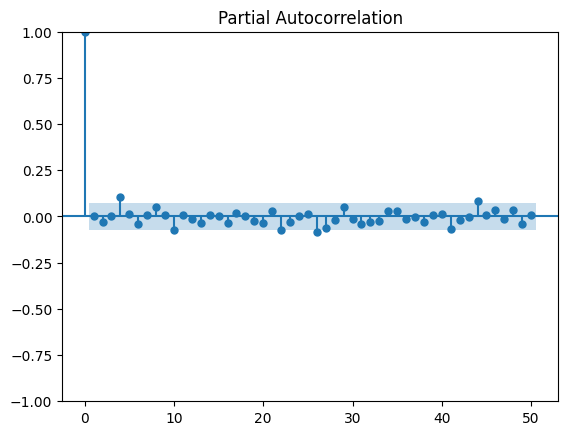

In [45]:
pacf_plot = plot_pacf(df['daily_returns'], lags = 50)

From pacf plot we can infer that values for p are 1,5,44 whch are outside shaded region

Splitting data set in to training and testing

In [46]:
len(df)

737

In [47]:
train=df[:-30]
test=df[-30:]

ARIMA model

In [49]:
from statsmodels.tsa.arima.model import ARIMA

In [50]:
model = ARIMA(train['daily_returns'],order=(1,0,5))
result=model.fit()
result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          daily_returns   No. Observations:                  707
Model:                 ARIMA(1, 0, 5)   Log Likelihood                1927.811
Date:                Mon, 25 Mar 2024   AIC                          -3839.622
Time:                        02:03:55   BIC                          -3803.134
Sample:                             0   HQIC                         -3825.524
                                - 707                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.628      0.104      -0.000       0.002
ar.L1          0.0536      8.474      0.006      0.995     -16.555      16.662
ma.L1         -0.0641      8.479     -0.008      0.994     -16.682      16.554
ma.L2         -0.0304      0.101     -0.302      0.763      -0.228       0.167
ma.L3          0.0008      0.262      0.003      0.998      -0.513       0.514
ma.L4          0.0909      0.039      2.323      0.020       0.014       0.168
ma.L5         -0.0008      0.770     -0.001      0.999      -1.511       1.509
sigma2         0.0003   1.09e-05     23.015      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                47.82
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-51-dda93fc59791>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['forecast']=result.predict(start = start, end = end)


<Axes: xlabel='Date'>

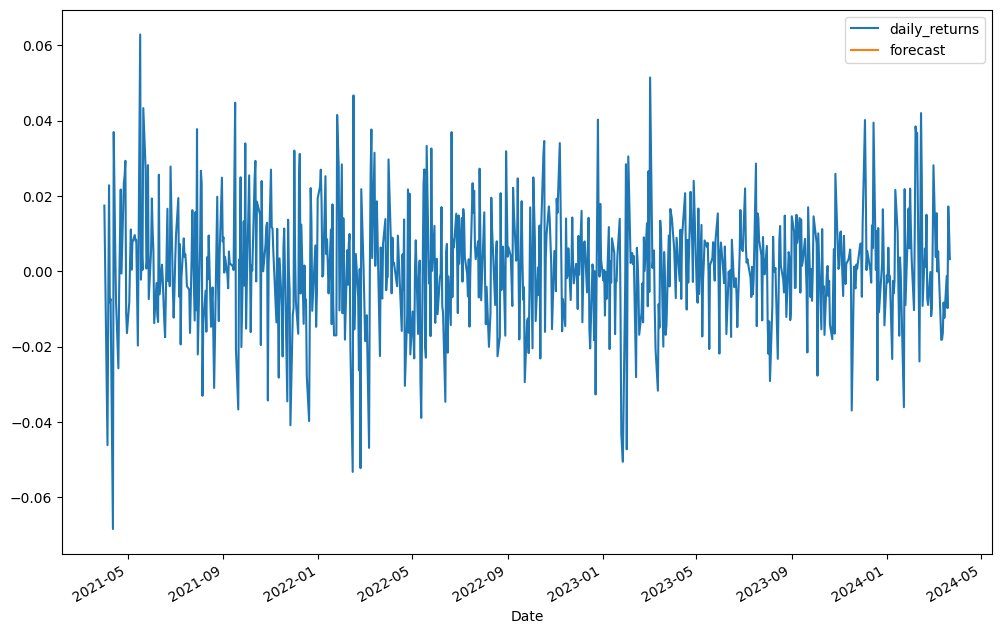

In [51]:
start=len(train)
end=len(train)+len(test)-1

df['forecast']=result.predict(start = start, end = end)
df[['daily_returns','forecast']].plot(figsize=(12,8))

#  SARIMAMODEL

In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_S = SARIMAX(df['daily_returns'],order=(2, 0, 0),seasonal_order=(1,0,1,44))
result_S = model_S.fit()
result_S.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                        daily_returns   No. Observations:                  737
Model:             SARIMAX(2, 0, 0)x(1, 0, [1], 44)   Log Likelihood                2007.067
Date:                              Mon, 25 Mar 2024   AIC                          -4004.135
Time:                                      02:11:01   BIC                          -3981.122
Sample:                                           0   HQIC                         -3995.260
                                              - 737                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0131      0.031      0.417      0.677      -0.048       0.075
ar.L2         -0.0273      0.037     -0.740      0.459      -0.100       0.045
ar.S.L44       0.3035      0.444      0.683      0.495      -0.567       1.174
ma.S.L44      -0.2204      0.452     -0.488      0.625      -1.105       0.665
sigma2         0.0003   1.04e-05     24.320      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                53.97
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<ipython-input-58-ca9f0ce5183b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['forecast_s']=result_S.predict(start= start, end =end)


<Axes: xlabel='Date'>

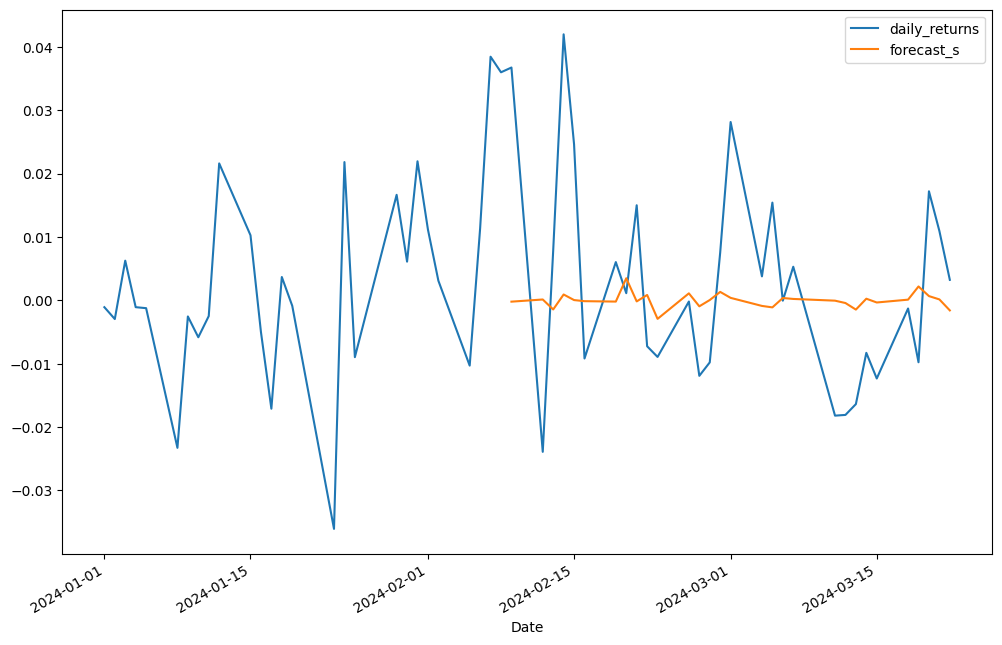

In [58]:
df['forecast_s']=result_S.predict(start= start, end =end)
df['2024-01-01':][['daily_returns','forecast_s']].plot(figsize=(12,8))

performing similar analysis for simple moving averages

In [70]:
adf_test(df['sma1d'])

Augmented Dicky fuller test :{title}
ADF test_statistic     -1.224990e+01
p-value                 9.593358e-23
#lags_used              3.000000e+00
#observations           7.330000e+02
Critical value (1%)    -3.439303e+00
Critical value (5%)    -2.865491e+00
Critical value (10%)   -2.568874e+00
reject null hypothesis
Data has no unit root and is stationary


In [71]:
adf_test(df['sma3d'])

Augmented Dicky fuller test :{title}
ADF test_statistic     -6.653637e+00
p-value                 5.047662e-09
#lags_used              2.000000e+01
#observations           7.160000e+02
Critical value (1%)    -3.439516e+00
Critical value (5%)    -2.865585e+00
Critical value (10%)   -2.568924e+00
reject null hypothesis
Data has no unit root and is stationary


In [72]:
adf_test(df['sma5d'])

Augmented Dicky fuller test :{title}
ADF test_statistic       -5.623599
p-value                   0.000001
#lags_used               20.000000
#observations           716.000000
Critical value (1%)      -3.439516
Critical value (5%)      -2.865585
Critical value (10%)     -2.568924
reject null hypothesis
Data has no unit root and is stationary


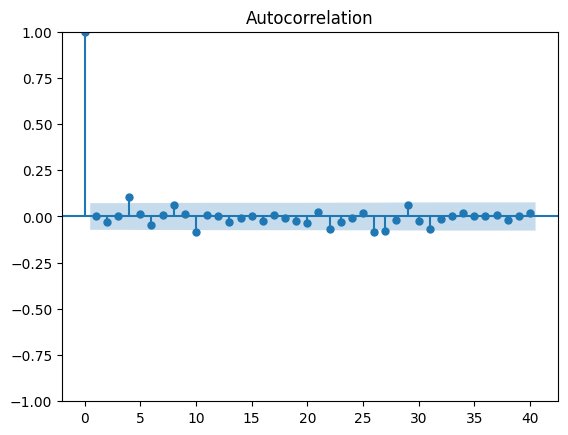

In [66]:
plot_acf(df['sma1d'],lags=40);

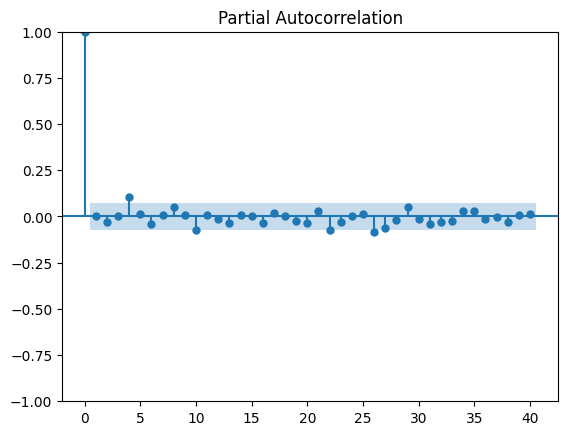

In [67]:
plot_pacf(df['sma1d'],lags=40);

wecan see that 1,5 are values for p

In [77]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_1d = SARIMAX(df['sma1d'],order=(2, 0, 0),seasonal_order=(1,0,1,44))
result_1d = model_1d.fit()
result_1d.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                sma1d   No. Observations:                  737
Model:             SARIMAX(2, 0, 0)x(1, 0, [1], 44)   Log Likelihood                2007.067
Date:                              Mon, 25 Mar 2024   AIC                          -4004.135
Time:                                      02:42:31   BIC                          -3981.122
Sample:                                           0   HQIC                         -3995.260
                                              - 737                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0131      0.031      0.417      0.677      -0.048       0.075
ar.L2         -0.0273      0.037     -0.740      0.459      -0.100       0.045
ar.S.L44       0.3035      0.444      0.683      0.495      -0.567       1.174
ma.S.L44      -0.2204      0.452     -0.488      0.625      -1.105       0.665
sigma2         0.0003   1.04e-05     24.320      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                53.97
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<ipython-input-78-a8f6a960f2ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['forecast_1d']=result_1d.predict(start= start, end =end)


<Axes: xlabel='Date'>

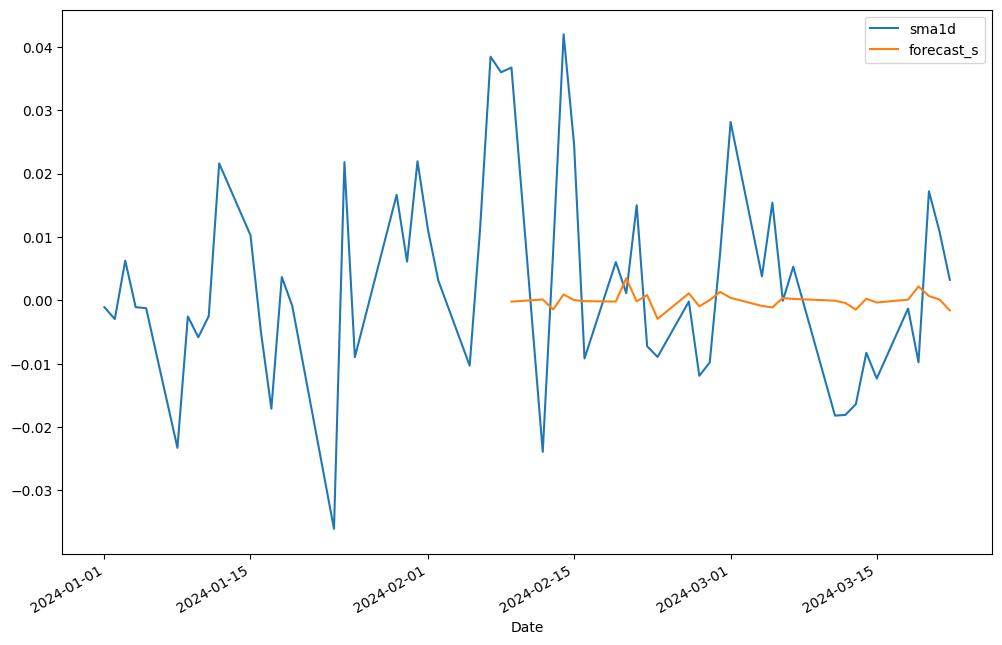

In [78]:
df['forecast_1d']=result_1d.predict(start= start, end =end)
df['2024-01-01':][['sma1d','forecast_s']].plot(figsize=(12,8))

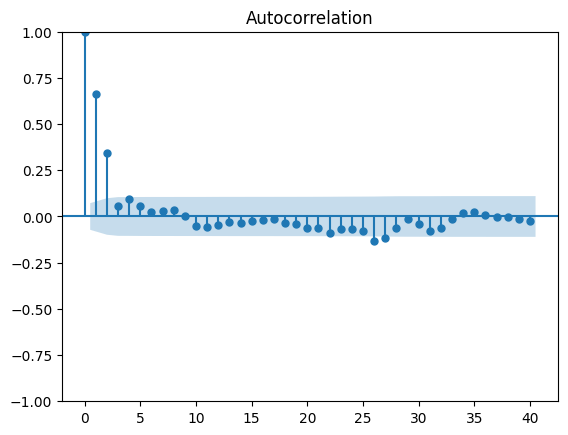

In [74]:
# for sma3d
acf_plot=plot_acf(df['sma3d'],lags=40)

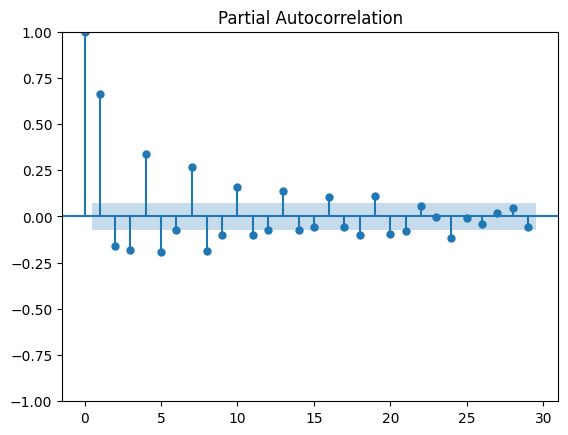

In [76]:
pacf_plot=plot_pacf(df['sma3d'])

 from pacf we can use 1,2,5,8,11,14,17,20,23 for autoreggression

In [79]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_3d = SARIMAX(df['sma3d'],order=(2, 0,2),seasonal_order=(1,0,1,20))
result_3d = model_3d.fit()
result_3d.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                sma3d   No. Observations:                  737
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 20)   Log Likelihood                2800.868
Date:                              Mon, 25 Mar 2024   AIC                          -5587.737
Time:                                      02:42:59   BIC                          -5555.519
Sample:                                           0   HQIC                         -5575.312
                                              - 737                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0726      0.031      2.340      0.019       0.012       0.133
ar.L2         -0.0373      0.038     -0.976      0.329      -0.112       0.038
ma.L1          0.9737      0.013     76.324      0.000       0.949       0.999
ma.L2          0.9732      0.013     72.185      0.000       0.947       1.000
ar.S.L20      -0.1239      0.292     -0.425      0.671      -0.696       0.448
ma.S.L20      -0.0148      0.291     -0.051      0.960      -0.586       0.556
sigma2      2.889e-05   1.18e-06     24.544      0.000    2.66e-05    3.12e-05
===================================================================================
Ljung-Box (L1) (Q):                   1.92   Jarque-Bera (JB):                62.33
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<ipython-input-82-84960f4f556d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['forecast_3d']=result_1d.predict(start= start, end =end)


<Axes: xlabel='Date'>

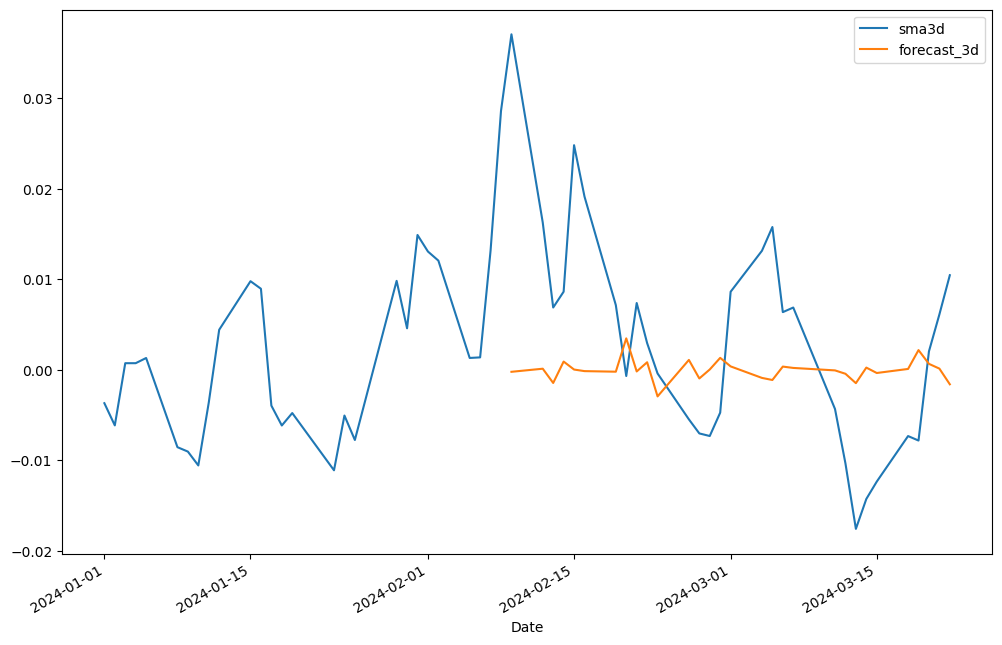

In [82]:
df['forecast_3d']=result_1d.predict(start= start, end =end)
df['2024-01-01':][['sma3d','forecast_3d']].plot(figsize=(12,8))

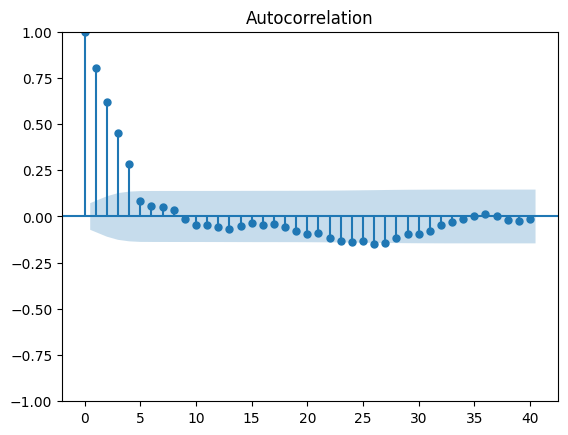

In [83]:
# for 5day
acf_plot=plot_acf(df['sma5d'],lags=40)

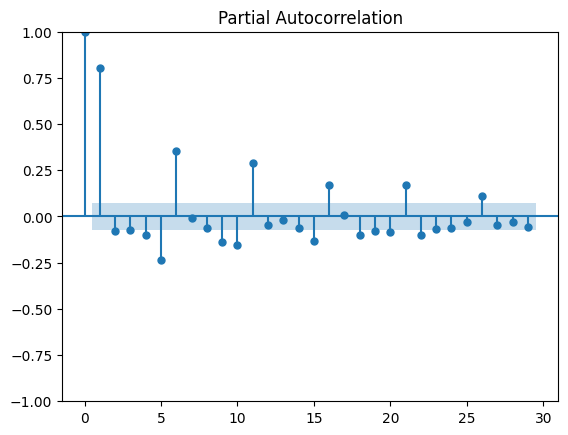

In [84]:
pacf=plot_pacf(df['sma5d'])

p value can be 1,6,11,16,21,26

In [85]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_5d = SARIMAX(df['sma3d'],order=(1, 0,5),seasonal_order=(1,0,5,20))
result_5d = model_3d.fit()
result_5d.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                sma3d   No. Observations:                  737
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 20)   Log Likelihood                2800.868
Date:                              Mon, 25 Mar 2024   AIC                          -5587.737
Time:                                      02:49:47   BIC                          -5555.519
Sample:                                           0   HQIC                         -5575.312
                                              - 737                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0726      0.031      2.340      0.019       0.012       0.133
ar.L2         -0.0373      0.038     -0.976      0.329      -0.112       0.038
ma.L1          0.9737      0.013     76.324      0.000       0.949       0.999
ma.L2          0.9732      0.013     72.185      0.000       0.947       1.000
ar.S.L20      -0.1239      0.292     -0.425      0.671      -0.696       0.448
ma.S.L20      -0.0148      0.291     -0.051      0.960      -0.586       0.556
sigma2      2.889e-05   1.18e-06     24.544      0.000    2.66e-05    3.12e-05
===================================================================================
Ljung-Box (L1) (Q):                   1.92   Jarque-Bera (JB):                62.33
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<ipython-input-86-7286b4942a1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['forecast_5d']=result_1d.predict(start= start, end =end)


<Axes: xlabel='Date'>

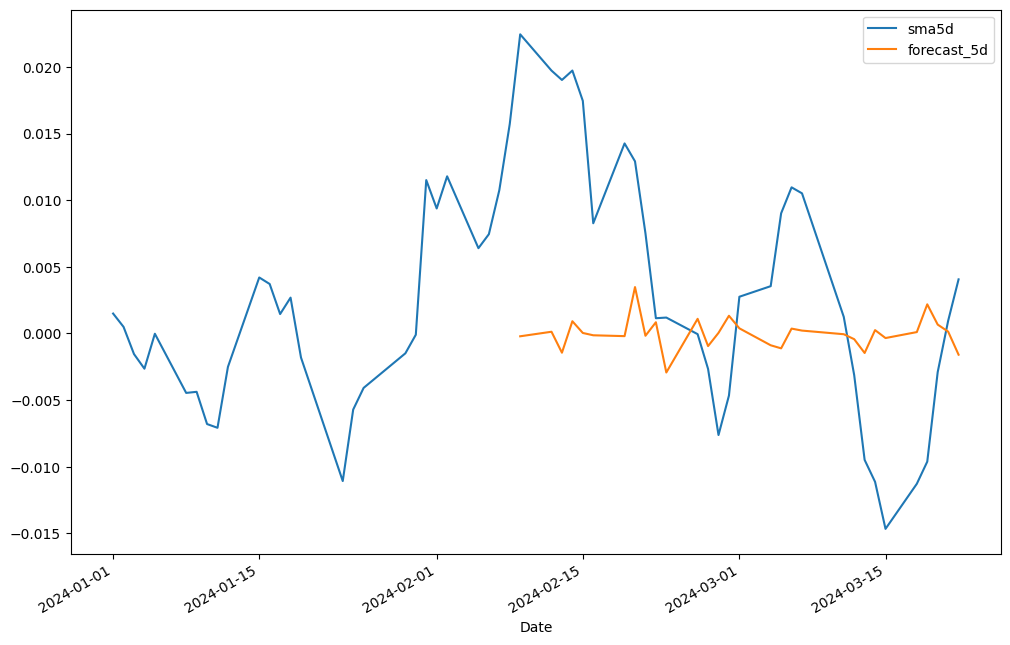

In [86]:
df['forecast_5d']=result_1d.predict(start= start, end =end)
df['2024-01-01':][['sma5d','forecast_5d']].plot(figsize=(12,8))

## LSTM model

In [87]:
#this program creates the dependent variable for LSTM which is used for the hidden layers to update the information to the gates
import numpy as np
def create_x_y(data,look_back):
  x_data, y_data = [],[]
  for i in range(len(data) - look_back - 1):
    iv = data[i:(i+look_back),0]
    dv = data[i + look_back,0]
    x_data.append(iv)
    y_data.append(dv)
  x_data = np.array(x_data)
  y_data = np.array(y_data)
  return x_data,y_data


In [88]:
x_data,y_data = create_x_y(df[['daily_returns']].values,look_back = 5)

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train,X_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=101)

In [91]:
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

In [92]:
from tensorflow.keras.models import Sequential
model = Sequential()

In [93]:
from tensorflow.keras.layers import LSTM,Dense
look_back = 5

In [94]:
X_train.shape

(584, 1, 5)

In [95]:
model.add(LSTM(15, input_shape = (1, look_back), return_sequences=True))
model.add(LSTM(15,return_sequences=True))
model.add(LSTM(20,return_sequences=True))
model.add(LSTM(500,return_sequences=True))
model.add(LSTM(250,return_sequences=True))
model.add(LSTM(500,return_sequences=True))
model.add(LSTM(15,return_sequences=True))
model.add(LSTM(2500,return_sequences=True))
model.add(LSTM(20,return_sequences=True))
model.add(LSTM(15,return_sequences=True))
model.add(LSTM(250,return_sequences=True))
model.add(LSTM(500,return_sequences=True))
model.add(LSTM(15,return_sequences=True))
model.add(LSTM(2500,return_sequences=True))
model.add(LSTM(20,return_sequences=True))
model.add(LSTM(15,return_sequences=True))
model.add(LSTM(4))# Last Lstm layer
model.add(Dense(100 , activation = "relu"))# output of lstm given to Artificial Neural netowork
model.add(Dense(150 , activation = "relu"))
model.add(Dense(250 , activation = "relu"))
model.add(Dense(100 , activation = "relu"))
model.add(Dense(150 , activation = "relu"))
model.add(Dense(250 , activation = "relu"))

In [96]:
model.add(Dense(1)) # the o/p layer

In [97]:
model.compile(loss = 'mean_squared_error', optimizer = "adam")

In [ ]:
model.fit(X_train,y_train, epochs = 10, batch_size = 2)

Epoch 1/10
292/292 [==============================] - 398s 1s/step - loss: 2.7775e-04
Epoch 2/10
292/292 [==============================] - 380s 1s/step - loss: 2.6251e-04
Epoch 3/10
292/292 [==============================] - 374s 1s/step - loss: 2.6090e-04
Epoch 4/10
292/292 [==============================] - 384s 1s/step - loss: 2.6510e-04
Epoch 5/10
292/292 [==============================] - 384s 1s/step - loss: 2.5735e-04
Epoch 6/10
292/292 [==============================] - 375s 1s/step - loss: 2.6165e-04
Epoch 7/10
292/292 [==============================] - 385s 1s/step - loss: 2.5864e-04
Epoch 8/10
292/292 [==============================] - 384s 1s/step - loss: 2.5903e-04
Epoch 9/10
254/292 [=========================>....] - ETA: 48s - loss: 2.5512e-04

In [99]:
y_pred = model.predict(X_test)

5/5 [==============================] - 7s 153ms/step


In [100]:
from sklearn.metrics import mean_squared_error

In [101]:
mean_squared_error(y_test,y_pred)

0.00026168987992343827

In [104]:
y_pred=y_pred.flatten()

In [108]:
df_lstm=pd.DataFrame(y_test,columns=['original'])

In [109]:
df_lstm['pred']=y_pred

<Axes: title={'center': 'Original vs predicted values'}>

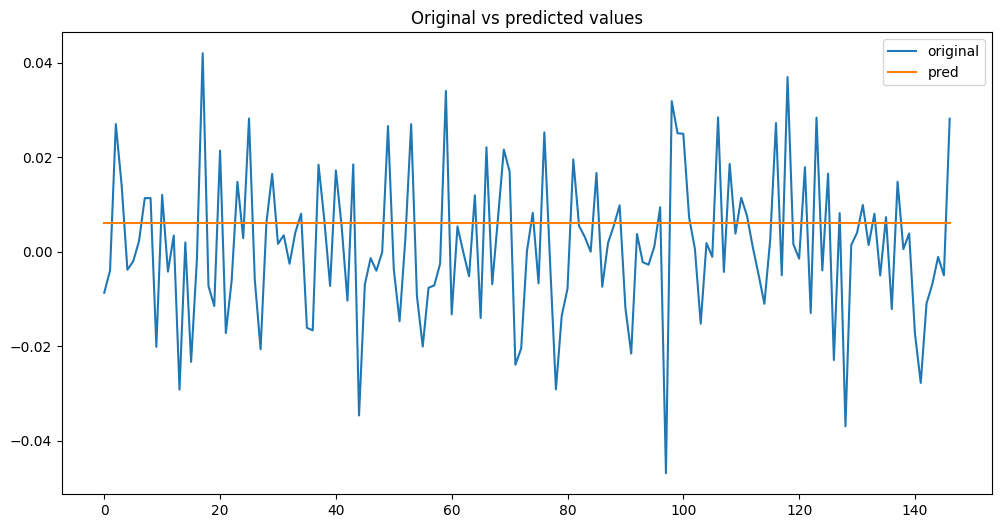

In [113]:
df_lstm.plot(legend=True,figsize=(12,6),title='Original vs predicted values')

### From the above we can see that there is a seasonality in data and it follows a pattern of repeating for every 5 days. so SARIMAX model with simple moving averages of 5d can be used for forecasting the model